In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

2.8.0


In [26]:
#trace = pd.HDFStore("test_profile_output-0.prof.h5") 
trace = pd.HDFStore("dpotrf-0.prof.h5")
data = trace.get('/events')
data.head()

HDF5ExtError: HDF5 error back trace

  File "H5F.c", line 620, in H5Fopen
    unable to open file
  File "H5VLcallback.c", line 3502, in H5VL_file_open
    failed to iterate over available VOL connector plugins
  File "H5PLpath.c", line 579, in H5PL__path_table_iterate
    can't iterate over plugins in plugin path '(null)'
  File "H5PLpath.c", line 620, in H5PL__path_table_iterate_process_path
    can't open directory: /usr/local/hdf5/lib/plugin
  File "H5VLcallback.c", line 3351, in H5VL__file_open
    open failed
  File "H5VLnative_file.c", line 97, in H5VL__native_file_open
    unable to open file
  File "H5Fint.c", line 1898, in H5F_open
    unable to lock the file
  File "H5FD.c", line 1625, in H5FD_lock
    driver lock request failed
  File "H5FDsec2.c", line 1002, in H5FD__sec2_lock
    unable to lock file, errno = 35, error message = 'Resource temporarily unavailable'

End of HDF5 error back trace

Unable to open/create file 'dpotrf-0.prof.h5'

In [16]:
data_refined = data[['begin', 'end', 'taskpool_id', 'task_class_id','chore_id', 'nb_data_items', 'total_data_size', 'priority']].copy()
data_refined['exec_time'] = data['end'] - data['begin']
data_refined = data_refined[data_refined.priority != -1]
data_refined.head()

,begin,end,taskpool_id,task_class_id,chore_id,nb_data_items,total_data_size,priority,exec_time
1,203347,223103,2,0,0,1,10,0,19756
2,276433,287738,2,0,0,1,10,0,11305
3,351749,382010,2,0,0,1,10,0,30261
4,394943,404457,2,0,0,1,10,0,9514
5,416353,425669,2,0,0,1,10,0,9316


In [15]:
print (data_refined.dtypes)

begin              object
end                object
taskpool_id        object
task_class_id      object
chore_id           object
nb_data_items      object
total_data_size    object
priority           object
exec_time          object
dtype: object


In [17]:
train_dataset = data_refined.sample(frac=0.8, random_state=0)
test_dataset = data_refined.drop(train_dataset.index)

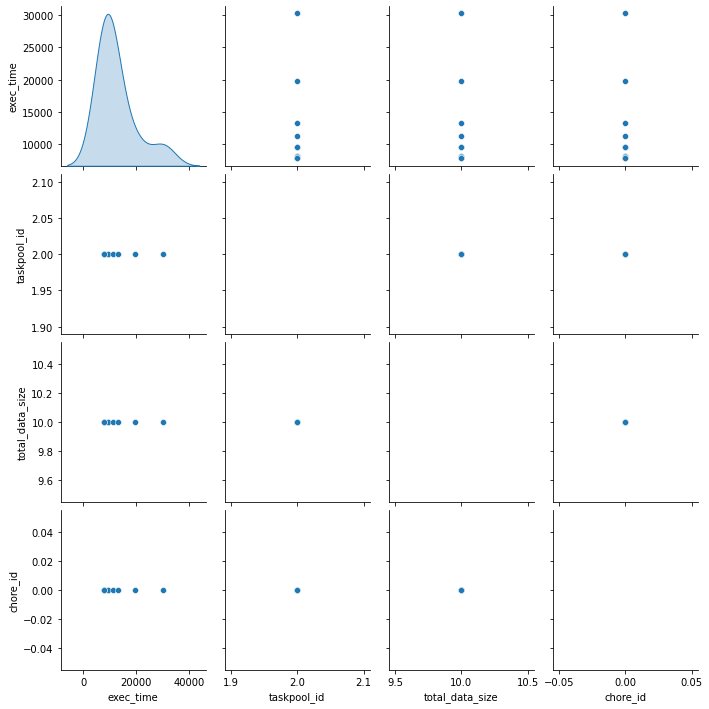

In [12]:
sns.pairplot(train_dataset[['exec_time', 'taskpool_id', 'total_data_size', 'chore_id']], diag_kind='kde')

In [18]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('exec_time')
test_labels = test_features.pop('exec_time')

In [20]:
normalizer = tf.keras.layers.Normalization(axis=-1)
#normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())



AttributeError: 'Normalization' object has no attribute 'mean'

In [3]:
a = [0, 1, 2, 3]
for a[1] in a:
    print(a)
    print(a[1])

[0, 0, 2, 3]
0
[0, 0, 2, 3]
0
[0, 2, 2, 3]
2
[0, 3, 2, 3]
3
